In [1]:
from andbro__querrySeismoData import __querrySeismoData
from obspy import UTCDateTime

import matplotlib.pyplot as plt


In [2]:
tbeg = UTCDateTime("2021-02-04 19:00")
tend = UTCDateTime("2021-02-04 19:30")


ipath = f"/import/freenas-ffb-01-data/romy_archive/{tbeg.year}/BW/DROMY/"

In [6]:
f1 , inv = __querrySeismoData(    
                                seed_id="BW.DROMY..F1V",
                                starttime=tbeg,
                                endtime=tend,
                                repository=,
                                path=ipath+"F1V.D/",
                                restitute=True,
                                detail=None,
                            )



failed to load mseed


In [5]:
f2 , inv = __querrySeismoData(    
                                seed_id="BW.DROMY..F2V",
                                starttime=tbeg,
                                endtime=tend,
                                repository="local",
                                path=ipath+"F2V.D/",
                                restitute=True,
                                detail=None,
                            )



failed to load mseed


(445.0, 455.0)

(445.0, 455.0)

(0.0, 150.0)

(0.0, 150.0)

Text(0, 0.5, 'ASD (mV/$\\sqrt{Hz}$)')

Text(0, 0.5, 'ASD (mV/$\\sqrt{Hz}$)')

Text(0.5, 0, 'frequency (Hz)')

Text(0.5, 0, 'frequency (Hz)')

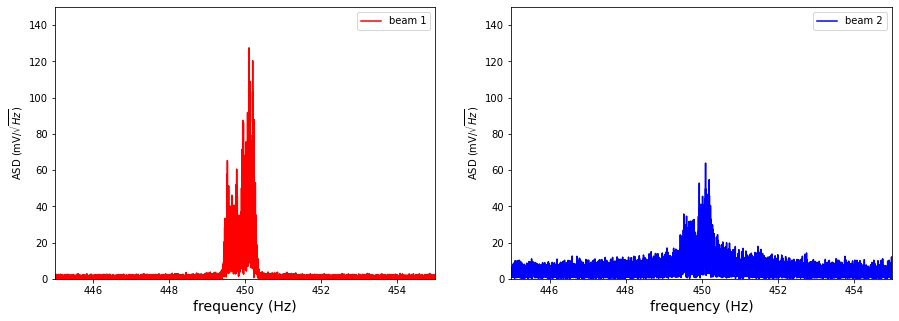

In [5]:
from andbro__fft import __fft

f1_fft, ff1 = __fft(f1[0].data, f1[0].stats.delta)
f2_fft, ff2 = __fft(f2[0].data, f2[0].stats.delta)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(ff1,f1_fft,'r')
ax[1].plot(ff2,f2_fft,'b')


ax[0].set_xlim(445, 455)
ax[1].set_xlim(445, 455)

ax[0].set_ylim(0, 150)
ax[1].set_ylim(0, 150)

ax[0].set_ylabel(r"ASD (mV/$\sqrt{Hz}$)")
ax[1].set_ylabel(r"ASD (mV/$\sqrt{Hz}$)")

ax[0].set_xlabel("frequency (Hz)", fontsize=14)
ax[1].set_xlabel("frequency (Hz)", fontsize=14)

ax[0].legend(["beam 1"])
ax[1].legend(["beam 2"])


In [6]:
f1[0].data = f1[0].data*1e-3
f2[0].data = f2[0].data*1e-3

In [7]:
stop1, stop2 = 449, 451

f1.filter('bandstop', freqmin=stop1, freqmax=stop2, corners=4, zerophase=True)
f2.filter('bandstop', freqmin=stop1, freqmax=stop2, corners=4, zerophase=True)

1 Trace(s) in Stream:
BW.DROMY..F1V | 2021-02-04T19:00:00.000000Z - 2021-02-04T19:30:00.000000Z | 5000.0 Hz, 9000001 samples

1 Trace(s) in Stream:
BW.DROMY..F2V | 2021-02-04T19:00:00.000000Z - 2021-02-04T19:30:00.000000Z | 5000.0 Hz, 9000001 samples

In [8]:
f_lower, f_upper = 445, 449

# f1.taper(0.1);
# f2.taper(0.1);

f1.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True);
f2.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True);



(440.0, 460.0)

(440.0, 460.0)

Text(0, 0.5, 'ASD (mV/$\\sqrt{Hz}$)')

Text(0, 0.5, 'ASD (mV/$\\sqrt{Hz}$)')

Text(0.5, 0, 'frequency (Hz)')

Text(0.5, 0, 'frequency (Hz)')

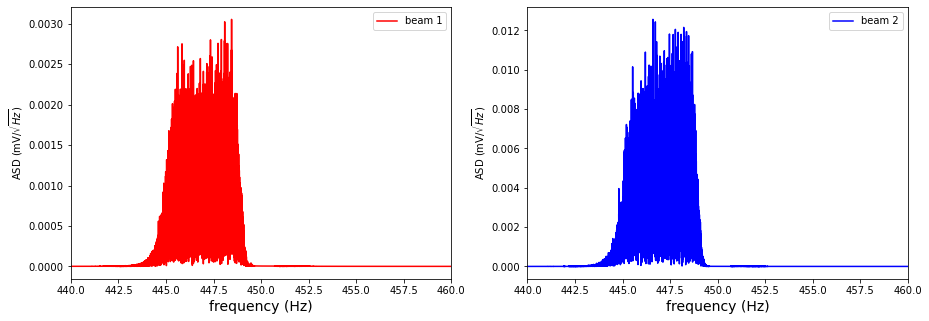

In [9]:
from andbro__fft import __fft

f1_fft, ff1 = __fft(f1[0].data, f1[0].stats.delta)
f2_fft, ff2 = __fft(f2[0].data, f2[0].stats.delta)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(ff1,f1_fft,'r')
ax[1].plot(ff2,f2_fft,'b')

ax[0].set_xlim(440, 460)
ax[1].set_xlim(440, 460)

ax[0].set_ylabel(r"ASD (mV/$\sqrt{Hz}$)")
ax[1].set_ylabel(r"ASD (mV/$\sqrt{Hz}$)")

ax[0].set_xlabel("frequency (Hz)", fontsize=14)
ax[1].set_xlabel("frequency (Hz)", fontsize=14)


ax[0].legend(["beam 1"])
ax[1].legend(["beam 2"])


In [10]:
from scipy.signal import hilbert

env1 = abs(hilbert(f1[0].data))
env2 = abs(hilbert(f2[0].data))


Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'singal (mV)')

Text(0, 0.5, 'singal (mV)')

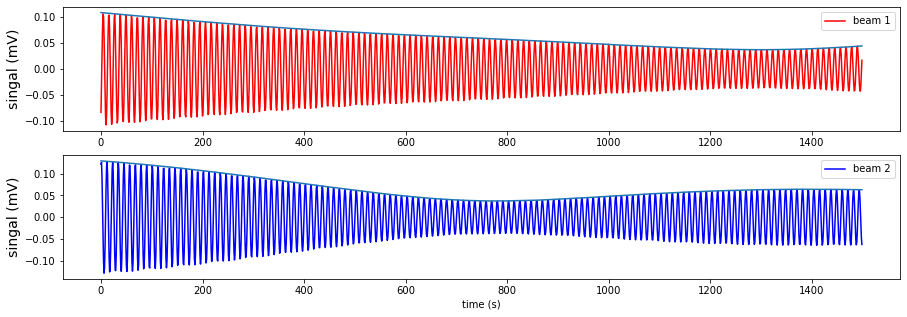

In [11]:

fig, ax = plt.subplots(2,1, figsize=(15,5))

n1, n2 = 500, 2000


ax[0].plot(f1[0].data[n1:n2],'r')
ax[1].plot(f2[0].data[n1:n2],'b')

ax[0].plot(env1[n1:n2])
ax[1].plot(env2[n1:n2])

ax[1].set_xlabel("time (s)")

ax[0].set_ylabel("singal (mV)", fontsize=14)
ax[1].set_ylabel("singal (mV)", fontsize=14)


ax[0].legend(["beam 1"])
ax[1].legend(["beam 2"])


Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'singal (mV)')

Text(0, 0.5, 'singal (mV)')

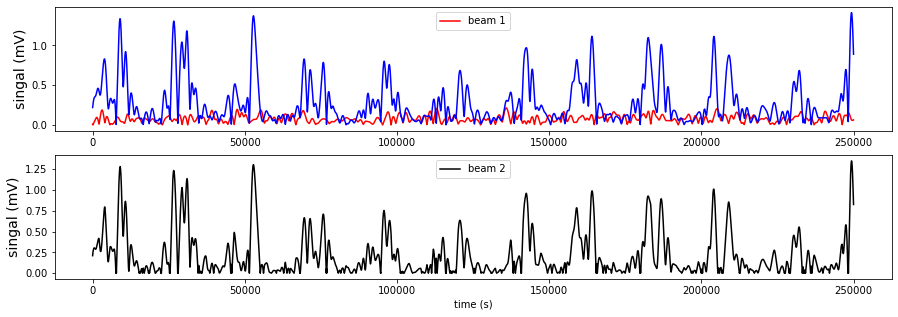

In [12]:
fig, ax = plt.subplots(2,1, figsize=(15,5))

n1, n2 = 10*5000, 60*5000

ax[0].plot(env1[n1:n2],'r')
ax[0].plot(env2[n1:n2],'b')

ax[1].plot(abs(env1[n1:n2]-env2[n1:n2]),'k')

ax[1].set_xlabel("time (s)")

ax[0].set_ylabel("singal (mV)", fontsize=14)
ax[1].set_ylabel("singal (mV)", fontsize=14)


ax[0].legend(["beam 1"])
ax[1].legend(["beam 2"])
